## Happiness Index



In [24]:
import pandas as pd # data manipulation
import numpy as np # maths 

import plotly.express as px 
# visuals
import plotly.graph_objects as go
import geopandas
import matplotlib.pyplot as plt

#### Import the dataset



In [2]:
happy_2021_df = pd.read_csv('data/world-happiness-report-2021.csv')

In [3]:
happy_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
happy_2021_df.shape

(149, 20)

In [5]:
happy_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
happy_2021_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [7]:
columns_to_drop = ['Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual','Standard error of ladder score', 'upperwhisker', 'lowerwhisker']

happy_2021_df.drop(columns_to_drop, axis = 1, inplace = True)

In [8]:
happy_2021_df.rename(columns = {'Ladder score': 'happy_score'}, inplace = True)

In [9]:
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Western Europe','Europe', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Central and Eastern Europe','Europe', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'North America and ANZ','North America', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Latin America and Caribbean','South America', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Southeast Asia','Asia', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'East Asia','Asia', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'South Asia','Asia', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Sub-Saharan Africa','Africa', inplace = True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Regional indicator'] == 'Middle East and North Africa','Africa', inplace = True)

In [10]:
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Russia', 'Europe',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Belarus', 'Europe',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Azerbaijan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Uzbekistan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Kazakhstan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Kyrgyzstan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Tajikistan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Ukraine', 'Europe',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Moldova', 'Europe',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Turkmenistan', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Armenia', 'Asia',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Georgia', 'Europe',inplace =True)

In [11]:
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'Australia', 'Oceania',inplace =True)
happy_2021_df['Regional indicator'].mask(happy_2021_df['Country name'] == 'New Zealand', 'Oceania',inplace =True)

In [12]:
happy_2021_df.rename(columns = {'Regional indicator': 'Continents'}, inplace = True)

In [13]:
happy_2021_df['Continents'].unique()

array(['Europe', 'Oceania', 'Africa', 'North America', 'South America',
       'Asia'], dtype=object)

In [14]:
happy_2021_df_copy = happy_2021_df.copy()

In [15]:
corr = happy_2021_df.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)

fig = go.Figure()
fig.add_trace(trace)

fig.update_layout(
    autosize=False,
    width=700,
    height=600,
   )
fig.show()

In [17]:
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
happy_2021_df_copy['CODE']=alpha3code(happy_2021_df_copy['Country name'])
happy_2021_df_copy.head()

,Country name,Continents,happy_score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,CODE
0,Finland,Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,FIN
1,Denmark,Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,DNK
2,Switzerland,Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,CHE
3,Iceland,Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,ISL
4,Netherlands,Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,NLD


In [22]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,happy_2021_df_copy,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='happy_score',ascending=False).reset_index()

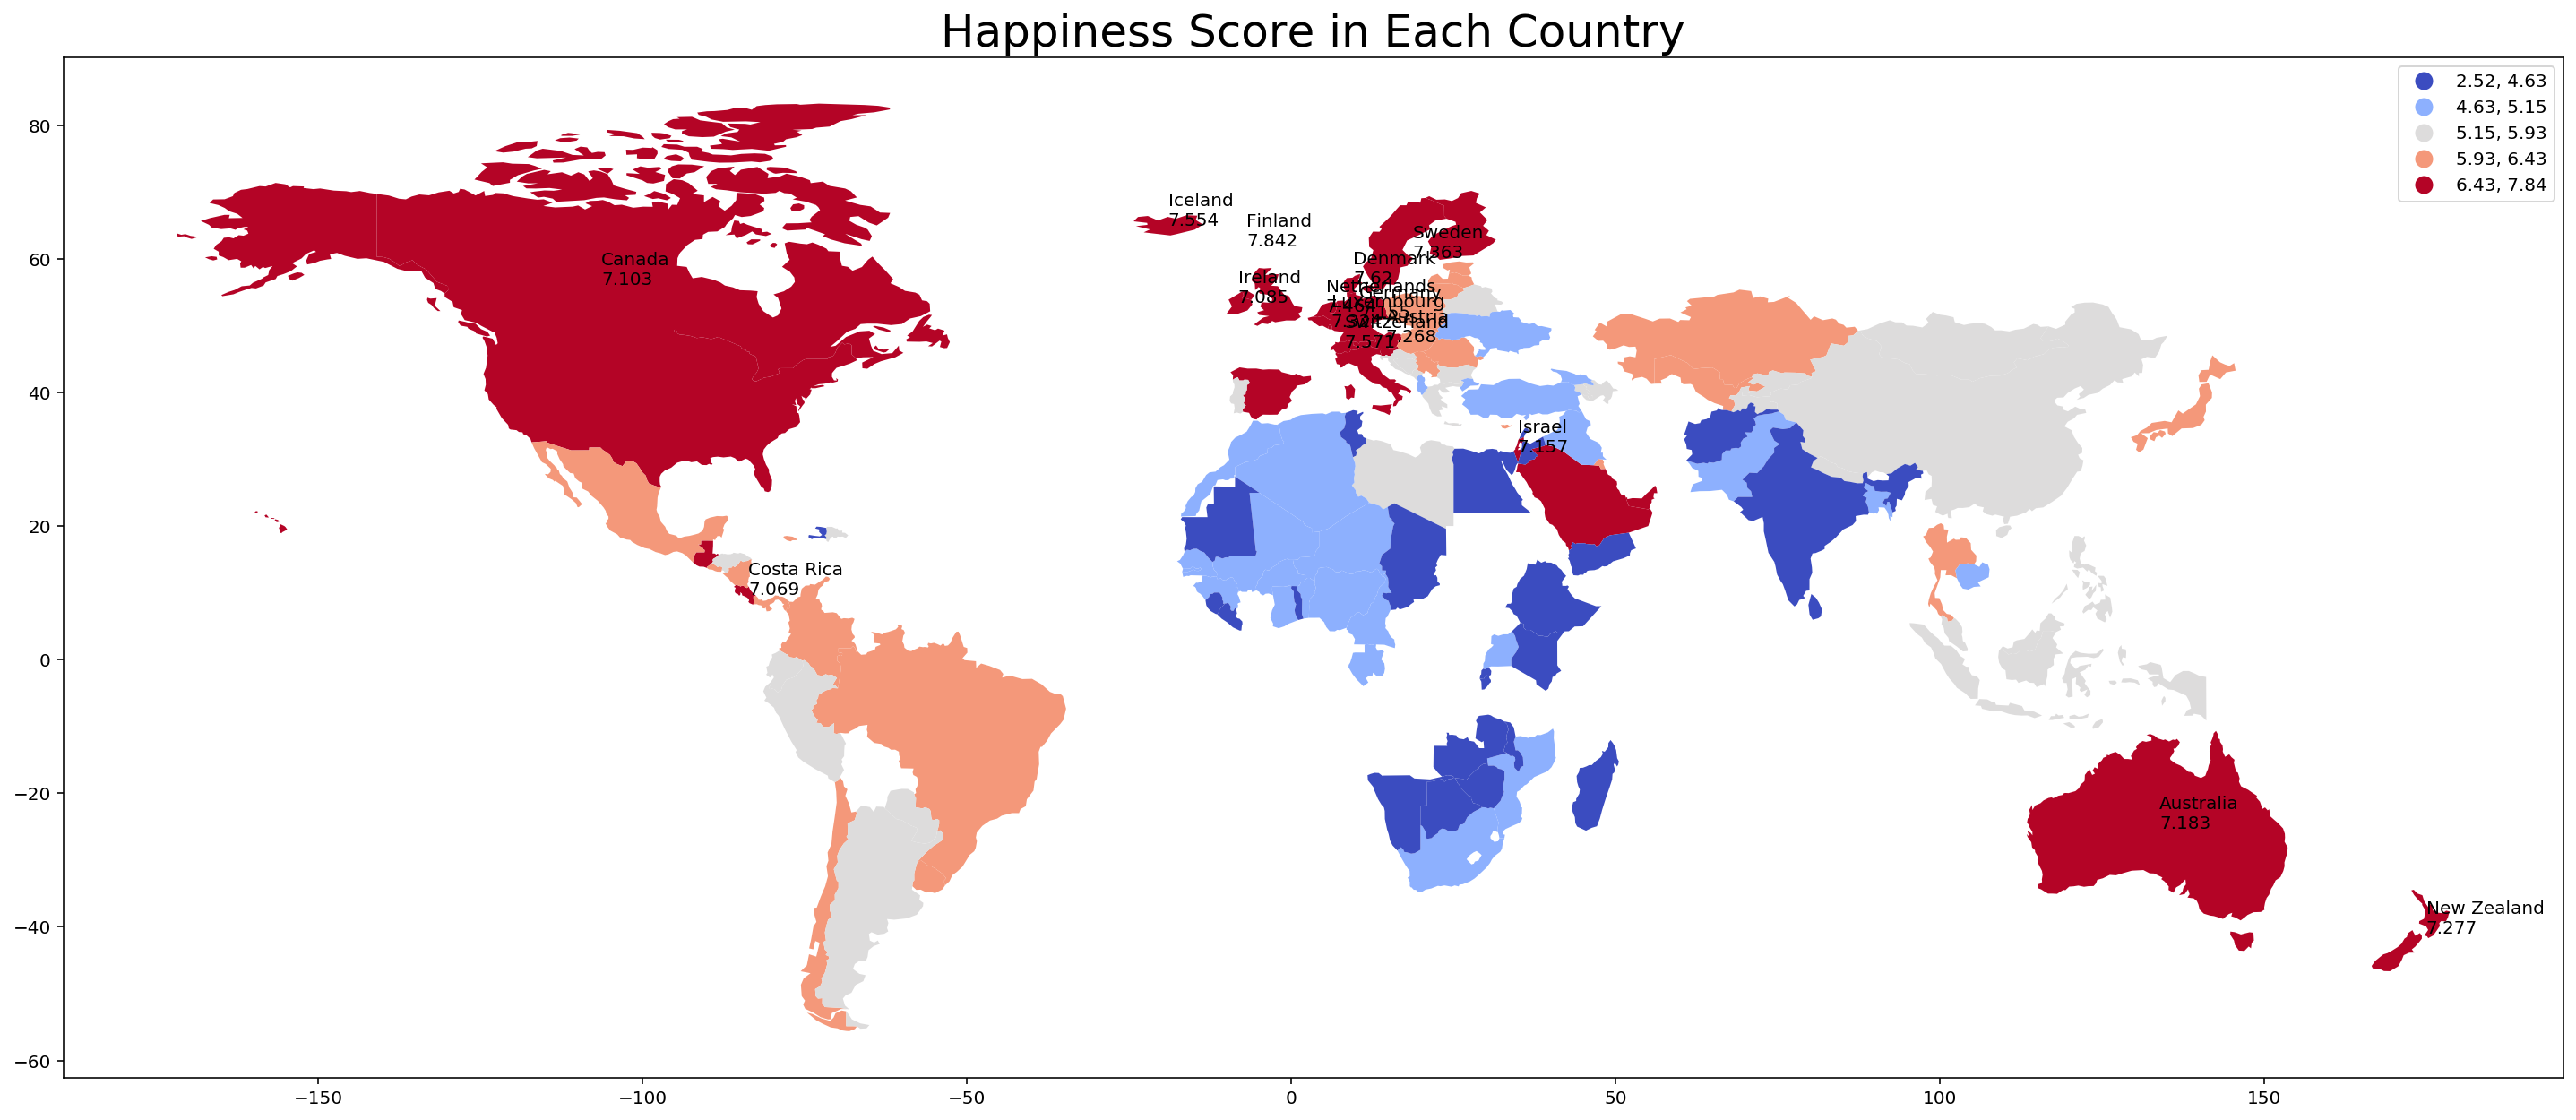

In [29]:
# plot confirmed cases world map 
merge.plot(column='happy_score', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Happiness Score in Each Country',fontsize=25)
# add countries names and numbers 
for i in range(0,15):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge['Country name'][i],merge.happy_score[i]),size=10)
plt.show()

##### GDP and Happy Score in 2021



In [25]:
import statsmodels

In [26]:
px.scatter(happy_2021_df, 'Logged GDP per capita', 'happy_score', color = 'Continents', size = 'Freedom to make life choices',hover_data=['Country name'], title = "GDP and Happiness Score Variation by Continents", trendline = 'ols', trendline_scope="overall")

#### What continent in average has the highest/lowest happiness score

In [27]:
continent_avgscore = happy_2021_df.groupby('Continents')[['happy_score']].mean().reset_index()

In [28]:
continent_avgscore.sort_values(by=['happy_score'], ascending=False, inplace=True)

In [29]:
px.bar(continent_avgscore, x='Continents', y='happy_score')

#### Which country had the most happy Index?



In [30]:
# happy_2021_df[['happy_score','Country name']].head(1)

In [31]:
happy_2021_df[happy_2021_df['happy_score'] == happy_2021_df['happy_score'].max()]

,Country name,Continents,happy_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,CODE
0,Finland,Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN


#### Which country had the min happy Index?


In [32]:
happy_2021_df[happy_2021_df['happy_score'] == happy_2021_df['happy_score'].min()]

,Country name,Continents,happy_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,CODE
148,Afghanistan,Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895,AFG


#### How does social support affect happiness



In [33]:
px.scatter(happy_2021_df, x = "Social support", y = "happy_score", hover_data = ["Country name"],color = 'Continents', size = 'Perceptions of corruption',trendline = "ols", trendline_scope = "overall", title="Relationship of Social Support and Happiness Index")

#### How strongly are life expectancy and happiness correlated

In [34]:
px.scatter(happy_2021_df, x = 'Healthy life expectancy', y = 'happy_score', hover_data = ["Country name"], title = "How Happiness Affects Life Expectancy", size= "Social support", color = 'Continents', trendline = "ols", trendline_scope = "overall")

In [35]:
px.box(happy_2021_df, x="Continents", y="happy_score")

In [36]:
px.scatter(happy_2021_df, x = 'Freedom to make life choices', y = 'Perceptions of corruption', hover_data = ["Country name"], title = "", size= "happy_score", color = 'Continents')

## Importing Population Dataframe

In [37]:
population_df = pd.read_csv('data/population_by_country_2020.csv')

In [38]:
population_df.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [39]:
population_df.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [40]:
population_df.rename(columns = {'Country (or dependency)': 'Country name'}, inplace = True)

In [41]:
population = population_df[['Population (2020)','Country name']]

In [42]:
happy_2021_df = pd.merge(happy_2021_df, population, on='Country name')

In [44]:
happy_2021_df.columns

Index(['Country name', 'Continents', 'happy_score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'CODE', 'Population (2020)'],
      dtype='object')

In [45]:
happy_2021_df.head()

,Country name,Continents,happy_score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,CODE,Population (2020)
0,Finland,Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,FIN,5542237
1,Denmark,Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,DNK,5795780
2,Switzerland,Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE,8665615
3,Iceland,Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,ISL,341628
4,Netherlands,Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,NLD,17141544


#### Does greater population indicate a change in happiness score



In [71]:
px.scatter(happy_2021_df, x = 'Population (2020)', y = 'happy_score', log_x=True,hover_data = ["Country name"], title = "", color = 'Continents')

#### Population and Corruption, happy Index



In [77]:
px.scatter(happy_2021_df, x =  "Population (2020)" , y = "Explained by: Perceptions of corruption",hover_data = ["Country name"],size = "happy_score", log_x = True, color = "Continents", title = "Varitation in Corruption and Happiness Index with Population (2020)")

#### life, popu and happy



In [74]:
px.scatter(happy_2021_df, x = 'Population (2020)', y = 'Healthy life expectancy',  color = 'Continents', size  = 'happy_score', hover_data = ["Country name"], log_x=True)

## Importing Happiness Dataset (2008-2019)

In [82]:
happy_all_df = pd.read_csv('data/world-happiness-report.csv')

In [89]:
happy_all_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [90]:
happy_all_df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2007, 2020, 2006, 2005])

In [91]:
happy_all_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [92]:
continents = happy_2021_df[['Continents','Country name']]

In [93]:
happy_all_df.rename(columns={'Life Ladder': 'happy_score'}, inplace =True)

In [94]:
happy_all_df = pd.merge(happy_all_df, continents, on='Country name')

In [95]:
happy_all_df.head()

,Country name,year,happy_score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continents
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Asia


#### Happiness Score over the years



In [100]:
year_score = happy_all_df.groupby('year')[['happy_score']].mean().reset_index()

In [107]:
px.line(cont_year_score,x = "year", y = "happy_score")

In [124]:
cont_year_score = happy_all_df.groupby(['Continents','year'])[['happy_score']].mean().reset_index()

In [120]:
px.line(cont_year_score,x = "year", y = "happy_score", color =  'Continents')

In [123]:
country_year_score = happy_all_df.groupby(['year', "Country name"])[['happy_score']].mean()
country_year_score

happy_score
year Country name              
2005 Australia            7.341
     Belgium              7.262
     Brazil               6.637
     Canada               7.418
     Denmark              8.019
...                         ...
2020 United States        7.028
     Uruguay              6.310
     Venezuela            4.574
     Zambia               4.838
     Zimbabwe             3.160

[1793 rows x 1 columns]

top 10



In [145]:
India = happy_all_df[happy_all_df["Country name"] == "India"]
China = happy_all_df[happy_all_df["Country name"] == "China"]
USA = happy_all_df[happy_all_df["Country name"] == "United States"]
Canada = happy_all_df[happy_all_df["Country name"] == "Canada"]
Israel = happy_all_df[happy_all_df["Country name"] == "Israel"]
Australia = happy_all_df[happy_all_df["Country name"] == "Australia"]
NZ = happy_all_df[happy_all_df["Country name"] == "New Zealand"]
Finland = happy_all_df[happy_all_df["Country name"] == "Finland"]
Iceland = happy_all_df[happy_all_df["Country name"] == "Iceland"]
Uruguay = happy_all_df[happy_all_df["Country name"] == "Uruguay"]
Saudi_Arabia = happy_all_df[happy_all_df["Country name"] == "Saudi Arabia"]
Chile = happy_all_df[happy_all_df["Country name"] == "Chile"]

In [159]:
top_10_final = pd.concat([India,China, USA, Canada, Israel, Australia, NZ, Finland, Iceland, Uruguay, Saudi_Arabia, Chile])

In [163]:
top_10_final.head()

,Country name,year,happy_score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continents
671,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199,Asia
672,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253,Asia
673,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259,Asia
674,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301,Asia
675,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267,Asia


In [161]:
top_count_year = top_10_final.groupby(['Country name','year'])[['happy_score']].mean().reset_index()

In [174]:
fig_=px.line(top_10_final,x = "year", y = "happy_score",color =  'Country name')
#.update_traces(textposition="bottom right")
#fig_.show()

In [164]:
px.pie(top_10_final, values = "Log GDP per capita", names = "Country name")

In [172]:
figs= px.line(top_10_final,x = "year", y = "Log GDP per capita", text= "happy_score",color =  'Country name')
figs.update_traces(textposition="bottom right")
figs.show()

In [173]:
px.pie(happy_2021_df, values = "Logged GDP per capita", names = "Continents",hover_data = ["happy_score"], title = 'Logged GDP score by country in 2021')